<a href="https://colab.research.google.com/github/qaz73/MN5002/blob/main/Section%201/Section1Assignment_gorourke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 Assignment - word vectors

Student number : 24514772

...This workbook follows the assignment templates in this order


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

The goals of the assignment include the following:
* Checking your understanding of the basic operations and relationships between word vectors on a downloaded corpus using Gensim
* Performing vector reasoning  on the corpus to determine answers to questions
* Identifying and exploring deficiencies and biases in a corpus


## Download a pre-trained corpus
Firstly ensure that you have Gensim installed and that it is the latest version. You will use Gensim to work with a corpus.

In [2]:
%pip install --upgrade gensim

Next, import Gensim

In [3]:
import gensim
import gensim.downloader

Next set a download directory for your Gensim data. You will need to modify the path to the directory to your own needs. Some tips on this are given [here](https://radimrehurek.com/gensim/downloader.html#gensim.downloader.BASE_DIR).

In [4]:
import gensim.downloader as api
#api.BASE_DIR = '/content/drive/MyDrive/MN5002'

Now, download the Google News corpus cited by Tomas Mikolov et.al. in [Distributed Representations of Words and Phrases and their Compositionality](http://arxiv.org/pdf/1310.4546.pdf). It is a big file, so it can take a few minutes.

**NOTE:** Especially in colab, when the file is done downloading you can see this error: FileNotFoundError: [Errno 2] No such file or directory: '/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'

This is because the function is trying to also read the file (not just download it). In colab, it tries to read the file on a path that is different from the one we specified above. Double check the give location, you should still see that "word2vec-google-news-300.gz" was succesfully downloaded. If so, you can ignore the error and open the file as we did in "gensim_word2vec_examples".


In [5]:
!ls /content/drive/MyDrive/MN5002/word2vec-google-news-300
google_news_vectors = api.load('word2vec-google-news-300')
#from gensim.models.keyedvectors import KeyedVectors

# - https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.load_word2vec_format.html
# binary is a boolean indicating whether the data is in binary word2vec format
# limit sets a maximum number of word-vectors to read from the file. The default, None, means read all.
#google_news_vectors = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/MN5002/word2vec-google-news-300/word2vec-google-news-300.gz", binary=True, limit=200000)

ls: cannot access '/content/drive/MyDrive/MN5002/word2vec-google-news-300': No such file or directory


Now it is time to explore the word vectors. You need to write code that uses [Gensim's word vector representations](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar) to answer the following questions and provide explanations of your answers using a Python print statement after each code step in your code, with careful consideration of how the meaning extracted from the corpus may be incorrect :


In [6]:
def print_similarity_table(header, data) :
    print('\n' + header)
    print('-' * 30)
    for word, score in data :
        print(f"{word:30} {score}")

    print('-' * 50);

### Q1. Knowing that the capital of Paris is France, use vector reasoning to find the capital of **Germany** and the capital of **Australia** and explain the answers

In [7]:
import numpy as np
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
# Paris - France ~ capital - country
# Paris - France ~ captial - Germany
# Paris + Germany - France ~ Capital
germany_capital = google_news_vectors.most_similar(positive=['Paris', 'Germany'], negative=['France'], topn=3)
print_similarity_table('Germany Capital', germany_capital)


australia_capital = google_news_vectors.most_similar(positive=['Paris', 'Australia'], negative=['France'], topn=5)

print_similarity_table('Australia Capital', australia_capital)

# try another way
#capital_country_paris = [
#    ('Paris','France' ),
#('Washington','USA' ),
#('Brasilia','Brazil' )
#]

#diff_vectors =[]

#for capital, country in capital_country_paris:
    #print(f'term: {capital} present {capital in google_news_vectors}')
    #print(f'term: {country} present {country in google_news_vectors}')

#    diff_vectors.append( google_news_vectors[capital] - google_news_vectors[country] )

#capital_direction = np.mean(diff_vectors, axis = 0)

#query = google_news_vectors.most_similar(positive=[capital_direction, 'Australia'],
#                                         negative=['France',
#                                                 #  'USA',
#                                                   'Brazil'
#                                                   ],
#                                         topn=8)
#print_similarity_table('Australia Capital via direction', query)


print("""
We use vector arithmetic in word embeddings to find the capital cities of Germany and Australia.  We project the relationship between two words onto another word, in order to see what the word is.
The idea is that the if model understands the relationship between Paris and France, and we should be able to apply the same relationship to find the capital of Germany and Australia.

word2vec has represented the words as high dimensional vectors, and we can apply vector operations on these to examine the relationships between words.
The relationship of Paris to France should the same as "the capital of germany" to Germany.

This can be calculated by v(Paris) - v(France) + v(Germany) ~ v(x), where X will be the capital of Germany.

In the above results, we can see that Berlin is the most similar wprd (0.76), so we can infer that the capital of Germany is Berlin.

In the above results, we can see that Melbourne is the most similar word (0.77), however from our knowledge of captial cities we know that this is incorrect as the captial of Australia is Canberra (0.67).
This "error", can be explained by the fact that Sydney and Melbourne are mentioned more frequently in different contexts (business, tourism, ...), than Canberra would be (politics), which would make them
more similar in the vector space to Paris + France and Berlin and Germany.

Out of curiousity I used Brasilia + Brazil (as this was mentioned in class) and Washington and USA as additional examples and calculated the average of the vectors.
When Brasilia alone was includes, Canberra was top of the list with a score of 0.3.
Once Washington & USA was added, Washington came in with a slightly higher score of 0.32.  Scores in this range would show that they are weakly related.
""")


Germany Capital
------------------------------
Berlin                         0.7644002437591553
Frankfurt                      0.7329736351966858
Dusseldorf                     0.7009457349777222
--------------------------------------------------

Australia Capital
------------------------------
Sydney                         0.7721031308174133
Melbourne                      0.7192801833152771
Canberra                       0.6764731407165527
Brisbane                       0.6720366477966309
Adelaide                       0.6661337614059448
--------------------------------------------------

We use vector arithmetic in word embeddings to find the capital cities of Germany and Australia.  We project the relationship between two words onto another word, in order to see what the word is.
The idea is that the if model understands the relationship between Paris and France, and we should be able to apply the same relationship to find the capital of Germany and Australia.

word2vec has repr

### Q2.  By considering the **USA** and by considering **Russia**, use vector reasoning to find the UK Prime Minister from the corpus and explain the answers you get.

**Approach**
* Assuming we don't know that the equivalent office in the USA & Russia is president
    *    Try and find out the equivalent role for USA / Russia.
* If we cannot infer the role name, then we assume that the role name is President

#### Lookup Prime Minister in corpus, Prime Minister doesn't exist

In [8]:
# List all words containing "prime" as Prime Minister does not exist as that string
res = [w for w in google_news_vectors.key_to_index if "prime" in w.lower() and "minister" in w.lower()]
for  word in res:
    print(f'word: {word}')
print ('Prime Minister is in the vectors as Prime_Minister and prime_minister - use the lower case one')

word: prime_minister
word: Prime_Minister
word: Prime_Minister_Manmohan_Singh
word: Deputy_Prime_Minister
word: Prime_Minister_Tony_Blair
word: Prime_Minister_Ehud_Olmert
word: Prime_Minister_Stephen_Harper
word: Prime_Minister_Nouri_al
word: Prime_Minister_Ariel_Sharon
word: Prime_Minister_Benjamin_Netanyahu
word: prime_ministers
word: Prime_Minister_Vladimir_Putin
word: Prime_Minister_Recep_Tayyip
word: Prime_Minister_Kevin_Rudd
word: Prime_Minister_Thaksin_Shinawatra
word: Prime_Minister_Junichiro_Koizumi
word: Prime_Minister_Silvio_Berlusconi
word: Prime_Minister_Naoto_Kan
word: Prime_Minister_Abhisit_Vejjajiva
word: Prime_Minister_Nuri_al
word: Prime_Minister_Yousuf_Raza
word: Prime_Minister_Julia_Gillard
word: Prime_Minister_Shaukat_Aziz
word: Prime_Minister_Ayad_Allawi
word: prime_ministerial
word: Prime_Minister_Benazir_Bhutto
word: Prime_Minister_George_Papandreou
word: Prime_Minister_Rafik_Hariri
word: Prime_Ministers
word: Prime_Minister_Shinzo_Abe
word: Prime_Minister_Datuk

In [9]:
# Try and find Role name for USA & Russia equivalent of Prime Minister
# v(UK) - v(Prime Minister) ~ v(USA) - v(US_Equivalent_of_Prime_Minister)
# v(UK) - v(Prime Minister) - v(USA) ~  v(US_Equivalent_of_Prime_Minister)

us_equivalent_of_uk_prime_minister = google_news_vectors.most_similar(positive=['prime_minister', 'USA'], negative=['UK'], topn=10)
print_similarity_table('US Equivalent of Prime Minister, i.e. v(UK) - v(Prime Minister) - v(USA) ~  v(US_Equivalent_of_Prime_Minister)', us_equivalent_of_uk_prime_minister)
print ('-' * 50)
print("""
1. From the word embeddings, we were unable to determine the equivalent role in the USA for Prime Minister, using vector arithmetic.\n
2. We will have to use our own domain knowledge and use President as the equivalent of Prime Minister for USA.\n
3. This is likely due to corpus bias: the news having fewer articles linking the USA President with the UK Prime Minister.
""")

# v(UK) - v(Prime Minister) ~ v(USA) - v(President)
us_uk_prime_minister = google_news_vectors.most_similar(positive=['President', 'UK'], negative=['USA'], topn=10)

print_similarity_table ('UK Prime Minister, i.e. result of v(USA) - v(President) - v(UK)', us_uk_prime_minister)

print("""
1. Using President - USA ~ X - UK, gives us Chief Executive, president and Tony Blair.
2. The first two are generic names and Tony Blair is likely what we want as the answer.
3. Its not unreasonable that the USA President would be linked to president or Chief Executive.
""")

# v(UK) - v(Prime Minister) ~ v(USA) - v(President)
usa_president_names = ['Bush', 'Obama','Trump']
for usa_president_name in usa_president_names:
    us_uk_prime_minister_using_president_name = google_news_vectors.most_similar(positive=[usa_president_name, 'UK'], negative=['USA'], topn=3)

    print_similarity_table (f'UK Prime Minister, i.e. using {usa_president_name} - USA', us_uk_prime_minister_using_president_name)

print(f"""
1. Further using our domain know and using Bush as the President name in the vector : President - USA ~ X - UK, gives us Tony Blair, who was a UK Prime Minister.
2. Using Obama or Trump as the name, does not provide the answer.  This might indicate that the training data may have preceeded their term in office.
""")


print ('-' * 50)
print ('Using Russia')
print ('-' * 50)
## russia
russia_equivalent_of_uk_prime_minister = google_news_vectors.most_similar(positive=['prime_minister', 'Russia'], negative=['UK'], topn=5)
print_similarity_table('Russia Equivalent of Prime Minister',russia_equivalent_of_uk_prime_minister)

print('Use President_Vladimir_Putin for the Russia role')
russia_equivalent_of_uk_prime_minister = google_news_vectors.most_similar(positive=['President_Vladimir_Putin', 'UK'], negative=['Russia'], topn=5)
print_similarity_table('UK Prime Minister',russia_equivalent_of_uk_prime_minister)

print(f"""
1. Using Prime Minister - UK = X - Russia, we get the term President_Vladimir_Putin
2. Using this, we get Prime_Minister_Tony_Blair and Tony Blair as the two most similar items.  Again Tony Blair was a UK Prime minister.
""")


US Equivalent of Prime Minister, i.e. v(UK) - v(Prime Minister) - v(USA) ~  v(US_Equivalent_of_Prime_Minister)
------------------------------
prime_minster                  0.5071303844451904
Prime_Minister                 0.4752308130264282
Prime_Minsiter                 0.470718652009964
prime_minsiter                 0.4681420922279358
Prime_Minster                  0.46444687247276306
prime_ministers                0.45180338621139526
Prime_Mnister                  0.4313995838165283
Inder_Kumar_Gujral             0.4286772310733795
Prime_MInister                 0.4268903136253357
Tsakhia_Elbegdorj              0.4198894798755646
--------------------------------------------------
--------------------------------------------------

1. From the word embeddings, we were unable to determine the equivalent role in the USA for Prime Minister, using vector arithmetic.

2. We will have to use our own domain knowledge and use President as the equivalent of Prime Minister for USA.

3. This

### Q3. What are the 5 most similar words to the word **BMW**? Explain your answer.

In [10]:
similar_bmw = google_news_vectors.most_similar('BMW', topn=5)
print(similar_bmw)
print("""
The 5 most similar words to the word BMW are: Audi, Mercedes_Benz, Porsche, Mercedes and Volkswagen.

The most_similar method on in the word2vec libary computes the cosine similarity between the vector for "BMW" and the vectors for other words.  It then looks for words that are closest to BMW in this vector space.
Intuitively you would expect related words to be in the luxury car market or related industries as BMW is a premium brand.
We see that the top 5 are all german (mostly) luxury brands in the car market.  Volkswagan may not be considered a luxury brand but it is relevant in terms of the german car context, so it's reasonable to include this.
The similarity between these is high because they share the same context in the corpus, and would make sense as they are likely discussed in the same context, e.g. news articles, advertisements.
""")

[('Audi', 0.7932199835777283), ('Mercedes_Benz', 0.7683466672897339), ('Porsche', 0.7272197604179382), ('Mercedes', 0.7078384160995483), ('Volkswagen', 0.6959410905838013)]

The 5 most similar words to the word BMW are: Audi, Mercedes_Benz, Porsche, Mercedes and Volkswagen.

The most_similar method on in the word2vec libary computes the cosine similarity between the vector for "BMW" and the vectors for other words.  It then looks for words that are closest to BMW in this vector space.
Intuitively you would expect related words to be in the luxury car market or related industries as BMW is a premium brand.
We see that the top 5 are all german (mostly) luxury brands in the car market.  Volkswagan may not be considered a luxury brand but it is relevant in terms of the german car context, so it's reasonable to include this.
The similarity between these is high because they share the same context in the corpus, and would make sense as they are likely discussed in the same context, e.g. news

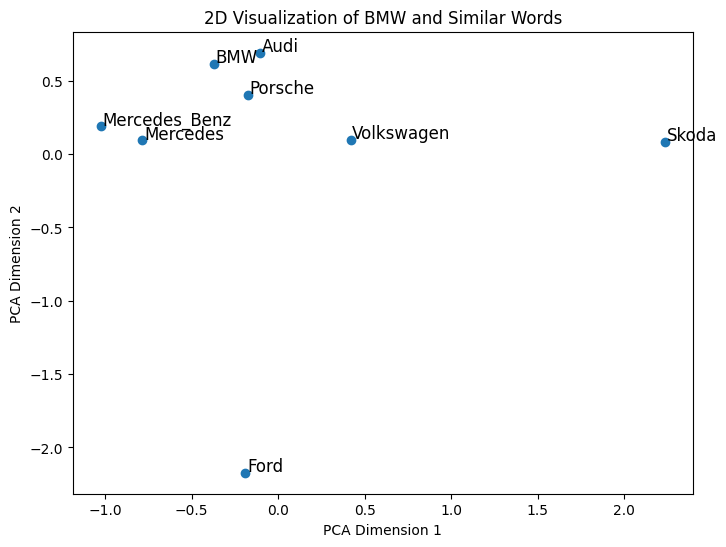

In [16]:
words_to_plot = ['Audi', 'Mercedes_Benz', 'Porsche', 'Mercedes' ,'Volkswagen', 'Skoda', 'BMW', 'Ford']
vectors_to_plot = np.array([google_news_vectors[word] for word in words_to_plot])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors_to_plot)

plt.figure(figsize=(8,6))
x = vectors_2d[:,0]
y = vectors_2d[:,1]

plt.scatter(x, y)

# Add labels
for i, word in enumerate(words_to_plot):
    plt.text(x[i]+0.01, y[i]+0.01, word, fontsize=12)

plt.title("2D Visualization of BMW and Similar Words")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()


### Q4. What are the 5 most similar words to the word **Tesla**? Explain your answer.


In [ ]:
similar_tesla = google_news_vectors.most_similar('Tesla', topn=5)
print(similar_tesla)
print("""
The 5 most similar words to the word Tesla are: Tesla_Motors, Tesla_Roadster, afford_Nummi_Musk, Telsa and electric_Tesla_Roadster.

Intuitively you would expect related words to be in the electric car market (or related industries), Elon Musk or about the inventor Telsa as Telsa is an electric car brand and the name of an inventor.

We see that the terms, Tesla_Motors, Tesla_Roadster and electric_Tesla_Roadster relate directly to Tesla cars, so it's reasonable to include these.
Telsa is likely included by the model as a mis spelling of Tesla.
afford_Nummi_Musk is likely includes as Musk would often be discussed in the same context as Tesla.
The similarity between these is high because they share the same context in the training data, and it would make sense as they are likely discussed in the same context, e.g. news articles, advertisements.
The model has been able to distinguish these from the german luxury brands (e.g. BMW) referenced in the previous question, as they are likely to be discussed in different contexts.

""")

### Q5. Which of the words **battle** and **love** are closest to the word **fight**? Explain your answer.

In [ ]:
#https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.similarity.html
# higher score -> words closer
sim_battle = google_news_vectors.similarity('fight', 'battle')
sim_love = google_news_vectors.similarity('fight', 'love')
print('similarity fight-battle : ', sim_battle)
print('similarity fight-love : ', sim_love)
print("""
The similarity method calculates the cosine similarity between the two words.
The higher the score, the closer the words are to each other.
The similarity score for flight + battle is 0.7, while the score for flight and love is 0.13.
The word battle is closest to the word fight, as it has a higher similarity score.
Intuitively this would match our expectation as fight is often used in conjunction with battle.
""")

### Q6. Explore the corpus for gender bias in science. Start by considering that Albert Einstein is probably the most famous scientist. If you detect bias, elaborate on why it may be present, with specific examples, and what steps could be taken to address such bias.

In [ ]:
# ref - https://arxiv.org/abs/1607.06520 - an is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings
einstein_bias = google_news_vectors.most_similar(positive=['Einstein', 'woman'], negative=['man'], topn=3)
einstein_bias

### Q7. How is a word vector represented as a Python data structure? Explain with an example from the corpus.

In [ ]:
Einstein_vector = google_news_vectors['Einstein']
print (Einstein_vector)
print (type(Einstein_vector))
print (Einstein_vector.shape)

### Q8.  Which of these words is the odd one out? **California Texas Alaska India**

In [ ]:
from itertools import combinations
## https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html#gensim.models.Word2Vec.doesnt_match
words = ['California','Texas','Alaska','India']
result = google_news_vectors.doesnt_match(words)
print (result)
###########
print('-'*40)
word_pair_similarity = [(w1, w2, google_news_vectors.similarity(w1,w2)) for w1,w2 in combinations(words, 2)]
word_pair_similarity_sorted = sorted(word_pair_similarity, key=lambda x: x[2], reverse=True)

for ( w1, w2, score) in word_pair_similarity_sorted :
    print(f"{w1:15} {w2:15} {score}")